In [1]:
cd ..

/Users/kimyoungh/GoogleDrive/singlemolt/main/singlemolt


In [19]:
import numpy as np
import pandas as pd

import torch

import pyupbit

from kingsman.knights import TradingBERT

In [3]:
k200 = pd.read_csv('raw_data/k200.csv', header=0, index_col=0)
kq = pd.read_csv('raw_data/kq.csv', header=0, index_col=0)

In [4]:
k200.head()

,시가,고가,저가,종가,거래량,거래대금
날짜,,,,,,
20020116,89.930000,90.690002,88.989998,88.989998,389746200,2533905000000
20020117,88.019997,89.650002,87.370003,89.269997,554645100,3141845000000
20020118,89.180000,89.900002,88.190002,88.629997,391938000,2620233000000
20020121,88.129997,89.720001,87.629997,89.720001,360377600,2090446000000
20020122,90.250000,91.510002,89.709999,90.639999,520790500,2822430000000


In [5]:
kq.head()

,시가,고가,저가,종가,거래량,거래대금
날짜,,,,,,
20020116,731.700012,737.200012,729.099976,729.099976,354250500,1468671000000
20020117,720.299988,722.900024,709.599976,722.900024,338091800,1318622000000
20020118,725.500000,729.599976,720.200012,720.200012,312220700,1260192000000
20020121,716.700012,730.700012,715.299988,729.900024,259710400,1014651000000
20020122,732.000000,743.900024,732.000000,739.299988,300212900,1272653000000


In [18]:
print(k200.shape)
print(kq.shape)

(5000, 6)
(5000, 6)


In [6]:
k200_v = k200.values.reshape(1, -1, 6)
kq_v = kq.values.reshape(1, -1, 6)

values = np.concatenate((k200_v, kq_v), axis=0)

In [7]:
values.shape

(2, 5000, 6)

In [8]:
vdiff = values[:, 1:] - values[:, :-1]

In [9]:
vdiff[:, 0]

array([[-1.91000366e+00, -1.04000092e+00, -1.61999512e+00,
         2.79998779e-01,  1.64898900e+08,  6.07940000e+11],
       [-1.14000244e+01, -1.42999878e+01, -1.95000000e+01,
        -6.19995117e+00, -1.61587000e+07, -1.50049000e+11]])

In [10]:
vdiff.shape

(2, 4999, 6)

In [11]:
np.log(values + 1e-6)

array([[[ 4.4990316 ,  4.50744714,  4.48852399,  4.48852399,
         19.78100632, 28.56078271],
        [ 4.47756403,  4.49591323,  4.47015202,  4.49166546,
         20.13383901, 28.77583132],
        [ 4.49065681,  4.49869797,  4.47949362,  4.48447038,
         19.78661422, 28.59428436],
        ...,
        [ 5.89175473,  5.89429261,  5.88754741,  5.88890569,
         18.98888922, 29.50478844],
        [ 5.88173337,  5.88309956,  5.87315949,  5.87417205,
         19.08304598, 29.67288695],
        [ 5.87734351,  5.87947096,  5.87005931,  5.87495885,
         18.92817222, 29.53871465]],

       [[ 6.59537061,  6.60285924,  6.59181086,  6.59181086,
         19.68551485, 28.01537903],
        [ 6.57966778,  6.58327094,  6.5647014 ,  6.58327094,
         19.63882801, 27.90760837],
        [ 6.58686107,  6.59249641,  6.57952897,  6.57952897,
         19.55922087, 27.86228521],
        ...,
        [ 6.85041216,  6.85373192,  6.84568838,  6.84920414,
         21.06386917, 29.82222404],
  

In [12]:
model = TradingBERT()

In [13]:
assets_in = torch.randn(1, 1, 250, 24)

In [14]:
outputs = model(assets_in)

In [16]:
outputs.shape

torch.Size([1, 250, 16])

In [17]:
values.shape

(2, 5000, 6)

In [21]:
price = pyupbit.get_ohlcv('KRW-BTC', interval="minute1", count=5000)

In [23]:
price.head()

,open,high,low,close,volume,value
2022-04-13 05:04:00,49883000.0,49887000.0,49882000.0,49884000.0,0.330421,1.648232e+07
2022-04-13 05:05:00,49884000.0,49958000.0,49882000.0,49958000.0,0.575564,2.871205e+07
2022-04-13 05:06:00,49904000.0,49957000.0,49885000.0,49920000.0,0.556879,2.781321e+07
2022-04-13 05:07:00,49913000.0,49955000.0,49913000.0,49914000.0,1.187963,5.929997e+07
2022-04-13 05:08:00,49914000.0,49946000.0,49914000.0,49914000.0,0.598809,2.988960e+07


In [24]:
k200.head()

,시가,고가,저가,종가,거래량,거래대금
날짜,,,,,,
20020116,89.930000,90.690002,88.989998,88.989998,389746200,2533905000000
20020117,88.019997,89.650002,87.370003,89.269997,554645100,3141845000000
20020118,89.180000,89.900002,88.190002,88.629997,391938000,2620233000000
20020121,88.129997,89.720001,87.629997,89.720001,360377600,2090446000000
20020122,90.250000,91.510002,89.709999,90.639999,520790500,2822430000000


In [25]:
cols = {
    '시가': 'open',
    '고가': 'high',
    '저가': 'low',
    '종가': 'close',
    '거래량': 'volume',
    '거래대금': 'value'
}

In [27]:
k200.rename(columns=cols)

,open,high,low,close,volume,value
날짜,,,,,,
20020116,89.930000,90.690002,88.989998,88.989998,389746200,2533905000000
20020117,88.019997,89.650002,87.370003,89.269997,554645100,3141845000000
20020118,89.180000,89.900002,88.190002,88.629997,391938000,2620233000000
20020121,88.129997,89.720001,87.629997,89.720001,360377600,2090446000000
20020122,90.250000,91.510002,89.709999,90.639999,520790500,2822430000000
...,...,...,...,...,...,...
20220404,361.850006,365.079987,360.690002,364.940002,171554100,5298140000000
20220405,366.079987,366.670013,363.670013,364.739990,244226300,5262759000000
20220406,362.040009,362.959991,360.519989,361.010010,176510200,6512786000000


<AxesSubplot:xlabel='날짜'>

/Users/kimyoungh/miniforge3/envs/pytorch_m1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimyoungh/miniforge3/envs/pytorch_m1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


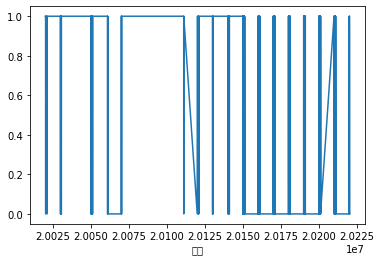

In [29]:
(k200['거래대금'] > kq['거래대금']).astype(int).plot()

In [31]:
k200 = k200.rename(columns=cols)

In [33]:
kq = kq.rename(columns=cols)

In [35]:
k200 = k200[['open', 'high', 'low', 'close', 'value']]
kq = kq[['open', 'high', 'low', 'close', 'value']]

In [40]:
cols_s = k200.columns.values.tolist()

In [42]:
k200[cols_s + cols_s]

,open,high,low,close,value,open,high,low,close,value
날짜,,,,,,,,,,
20020116,89.930000,90.690002,88.989998,88.989998,2533905000000,89.930000,90.690002,88.989998,88.989998,2533905000000
20020117,88.019997,89.650002,87.370003,89.269997,3141845000000,88.019997,89.650002,87.370003,89.269997,3141845000000
20020118,89.180000,89.900002,88.190002,88.629997,2620233000000,89.180000,89.900002,88.190002,88.629997,2620233000000
20020121,88.129997,89.720001,87.629997,89.720001,2090446000000,88.129997,89.720001,87.629997,89.720001,2090446000000
20020122,90.250000,91.510002,89.709999,90.639999,2822430000000,90.250000,91.510002,89.709999,90.639999,2822430000000
...,...,...,...,...,...,...,...,...,...,...
20220404,361.850006,365.079987,360.690002,364.940002,5298140000000,361.850006,365.079987,360.690002,364.940002,5298140000000
20220405,366.079987,366.670013,363.670013,364.739990,5262759000000,366.079987,366.670013,363.670013,364.739990,5262759000000
20220406,362.040009,362.959991,360.519989,361.010010,6512786000000,362.040009,362.959991,360.519989,361.010010,6512786000000


In [61]:
eps = 1e-6
k200_p = pd.DataFrame(np.zeros_like(k200),
                    index=k200.index, columns=k200.columns)
kmin_p = np.log(k200 + eps).iloc[:, :4].min().min()
kmax_p = np.log(k200 + eps).iloc[:, :4].max().max()
k200_p.iloc[:, :4] = (np.log(k200 + eps).iloc[:, :4] - kmin_p) / (kmax_p - kmin_p)

kvmin_p = np.log(k200 + eps).iloc[:, 4].min()
kvmax_p = np.log(k200 + eps).iloc[:, 4].max()
k200_p.iloc[:, 4] = (np.log(k200 + eps).iloc[:, 4] - kvmin_p) / (kvmax_p - kvmin_p)

k200_l = np.log(k200 + eps)
k200_l = k200_l.diff(1)

kmin_lp = k200_l.iloc[:, :4].min().min()
kmax_lp = k200_l.iloc[:, :4].max().max()
k200_lp = pd.DataFrame(np.zeros_like(k200),
                    index=k200.index, columns=k200.columns)
k200_lp.iloc[:, :4] = (k200_l.iloc[:, :4] - kmin_lp) / (kmax_lp - kmin_lp)

kvmin_lp = k200_l.iloc[:, 4].min()
kvmax_lp = k200_l.iloc[:, 4].max()
k200_lp.iloc[:, 4] = (k200_l.iloc[:, 4] - kvmin_lp) / (kvmax_lp - kvmin_lp)


In [62]:
k200_p

,open,high,low,close,value
날짜,,,,,
20020116,0.166316,0.170679,0.160869,0.160869,0.316557
20020117,0.155187,0.164700,0.151344,0.162498,0.371166
20020118,0.161975,0.166144,0.156187,0.158767,0.325064
20020121,0.155834,0.165104,0.152885,0.165104,0.267703
20020122,0.168158,0.175346,0.165047,0.170393,0.343940
...,...,...,...,...,...
20220404,0.888079,0.892686,0.886415,0.892488,0.503860
20220405,0.894105,0.894940,0.890680,0.892203,0.502159
20220406,0.888351,0.889667,0.886170,0.886874,0.556276


<AxesSubplot:xlabel='날짜'>

/Users/kimyoungh/miniforge3/envs/pytorch_m1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimyoungh/miniforge3/envs/pytorch_m1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


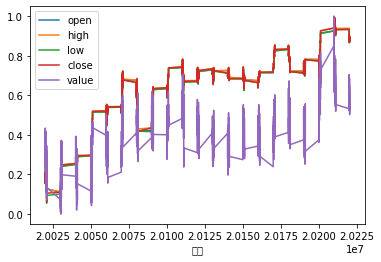

In [64]:
k200_p.plot()

In [63]:
k200_lp

,open,high,low,close,value
날짜,,,,,
20020116,NaN,NaN,NaN,NaN,NaN
20020117,0.368277,0.409957,0.381265,0.471533,0.565801
20020118,0.513288,0.470037,0.497548,0.428162,0.333060
20020121,0.408657,0.449943,0.431623,0.509640,0.307040
20020122,0.558091,0.541240,0.556783,0.501158,0.615784
...,...,...,...,...,...
20220404,0.433841,0.469630,0.448476,0.478521,0.259875
20220405,0.507117,0.476587,0.492876,0.456052,0.435668
20220406,0.411790,0.415681,0.421850,0.415222,0.564664


<AxesSubplot:xlabel='날짜'>

/Users/kimyoungh/miniforge3/envs/pytorch_m1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimyoungh/miniforge3/envs/pytorch_m1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


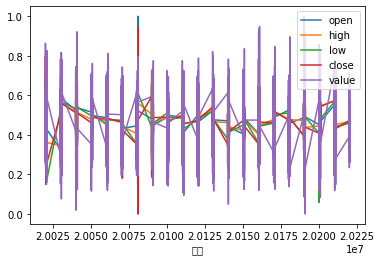

In [65]:
k200_lp.plot()

<AxesSubplot:xlabel='날짜'>

/Users/kimyoungh/miniforge3/envs/pytorch_m1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kimyoungh/miniforge3/envs/pytorch_m1/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


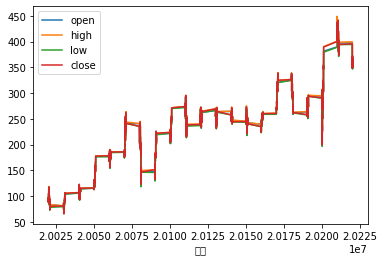

In [70]:
k200.iloc[:, :4].plot()